In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CliffWalking-v0')
env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


36

In [3]:
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Epsilon-greedy parameter
episodes = 500  # Number of episodes

In [4]:
q_table_q_learning = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_q_learning)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
action = env.action_space.sample( )
# 2. Implement this action and move the agent in the desired direction
state, reward, done, info = env.step(action)
# Display the results ( reward and map)
env.render()
print(f"Reward = {reward}")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10

Reward = -1


In [6]:
env.reset()
env.render()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [7]:
# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(q_table_q_learning)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
total_reward = 0
eps_reward = []

for i in range(episodes):
    state = env.reset()
    done = False
    # Until the agent gets stuck in a hole or reaches the goal , keep training it
    while not done:
    # Choose the action with the highest value in the current state
        if np.max(q_table_q_learning[state]) < 0:
            action = np.argmax(q_table_q_learning[state])
        # If there's no best action ( only zeros ) , take a random one
        else:
            action = env.action_space.sample()
        # Implement this action and move the agent in the desired direction
        new_state , reward , done, info = env.step(action)
        # Update Q (s, a )
        q_table_q_learning[state, action] = q_table_q_learning[state, action] + alpha * ( reward + gamma*np.max(q_table_q_learning[new_state]) - q_table_q_learning[state , action])
        # Update our current state
        state = new_state
        # If we have a reward , it means that our outcome is a success
#         if reward:
#             outcomes[-1] = ("Success")
        total_reward += reward
    eps_reward.append(total_reward)
    total_reward = 0

Q-table after training:
[[ -6.93228473  -6.92872634  -6.87651761  -6.92643132]
 [ -6.76466455  -6.78390696  -6.77599603  -6.90322937]
 [ -6.59438374  -6.54769055  -6.67662355  -6.52925495]
 [ -6.22646397  -6.26500324  -6.35310283  -6.4023986 ]
 [ -5.98384415  -5.97310218  -5.98215167  -6.08272588]
 [ -5.77246752  -5.60832596  -5.58804601  -5.95298972]
 [ -5.25158573  -5.20330985  -5.32405399  -5.20243605]
 [ -4.80969916  -4.78644555  -4.85320213  -4.88664162]
 [ -4.46168331  -4.34154291  -4.3514977   -4.33905586]
 [ -4.01263061  -3.85484777  -3.88294187  -4.18036652]
 [ -3.36579569  -3.28421995  -3.34317939  -3.37375433]
 [ -2.93924895  -3.01662704  -2.68540951  -2.70613389]
 [ -6.99937937  -7.01626375  -7.10024422  -7.08010976]
 [ -6.89947417  -6.78897437  -6.82872024  -6.94384368]
 [ -6.66835729  -6.53081458  -6.6008253   -6.7684232 ]
 [ -6.34827993  -6.23376297  -6.26417236  -6.45104489]
 [ -5.97651755  -5.85722838  -5.98825676  -6.16103266]
 [ -5.49102048  -5.46635442  -5.52330299 

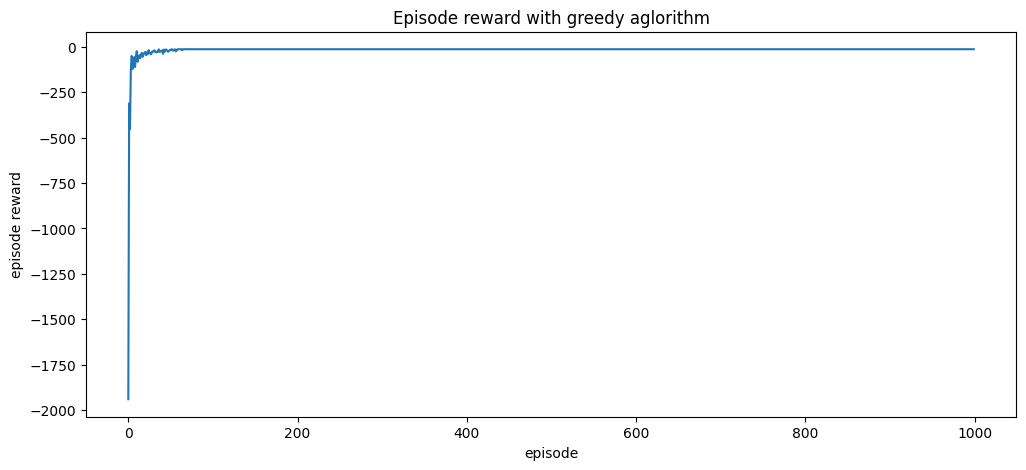

In [9]:
print('=========================')
print('Q-table after training:')
print(q_table_q_learning)
# Plot reward
plt.figure(figsize=(12, 5))
plt.xlabel("episode")
plt.ylabel("episode reward")
plt.title("Episode reward with greedy aglorithm")
plt.plot(range(len(eps_reward)), eps_reward)

In [10]:
def test_policy(q_table):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_reward += reward

    return total_reward

print("\nTesting Q-learning policy:")
q_learning_reward = test_policy(q_table_q_learning)
print(f"Total reward: {q_learning_reward}")





Testing Q-learning policy:
Total reward: -13


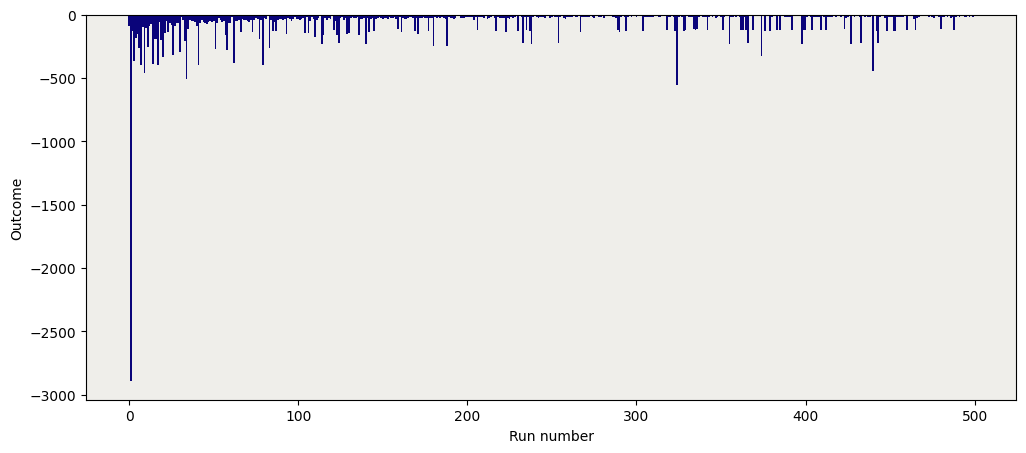

In [11]:
# Add the necessary import statement at the beginning of your code
import matplotlib.pyplot as plt
import gym
import numpy as np
# Assuming 'outcomes' should store rewards over episodes
outcomes = []

alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Epsilon-greedy parameter
episodes = 500  # Number of episodes
q_table_q_learning = np.zeros((env.observation_space.n, env.action_space.n))


def epsilon_greedy_policy(state, q_table):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0  # Initialize total reward for the episode

    while not done:
        action = epsilon_greedy_policy(state, q_table_q_learning)
        next_state, reward, done, _ = env.step(action)

        best_next_action = np.argmax(q_table_q_learning[next_state])
        td_target = reward + gamma * q_table_q_learning[next_state][best_next_action]
        td_error = td_target - q_table_q_learning[state][action]
        q_table_q_learning[state][action] += alpha * td_error

        state = next_state
        total_reward += reward  # Accumulate reward for the episode

    outcomes.append(total_reward)  # Store the total reward for the episode


# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [12]:
def test_policy(q_table):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_reward += reward

    return total_reward

print("\nTesting Q-learning policy:")
q_learning_reward = test_policy(q_table_q_learning)
print(f"Total reward: {q_learning_reward}")





Testing Q-learning policy:
Total reward: -13
